In [218]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [227]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [343]:
plt.rcParams.update(
    {
        "text.usetex": True,  # enable LaTex formatting
        "grid.linestyle": "dotted",  # dotted grid background
        "figure.figsize": (7, 5),  # figure size (width, height) in inches
        "font.family": "Computer Modern Roman",  # font (default LaTex font)
    }
)

In [348]:
from handlers import F, FPolyKernel, FGaussianKernel
from wbc import load_breast_cancer_data
from snsvm import svmOptimiser, Callback

In [349]:
train_loader, test_loader, data_processor = load_breast_cancer_data(
    input_encoder=True, output_encoder=False, verbose=False, saver=False
)

x = train_loader.x
y = train_loader.y
C = (1 / len(x)) * 1e-2
#f = FPolyKernel()
f = FGaussianKernel()
#f=F

snsvm = svmOptimiser(x=x, y=y, C=C)
callbacks = Callback()

data, w, itersnsvm, itercg, alphas = snsvm.optimize(
    f=f, callback=callbacks,
)
print(snsvm.sigma)

0.2


In [350]:
data

,Iteration,Objective,Gradient Norm,Active Set Size,w
0,0,0.021902,2.965365,546,"[0.02449650166879891, 0.025495555490045008, 0...."
1,1,0.020728,0.022151,546,"[0.01719319599457569, 0.0193126805877954, 0.01..."
2,2,0.020684,0.001002,546,"[0.01688116308972472, 0.01900114262484943, 0.0..."
3,3,0.020682,0.000046,546,"[0.01686679651183664, 0.018986823616197288, 0...."
4,4,0.020682,0.000002,546,"[0.01686613538733346, 0.018986164654477635, 0...."
5,5,0.020682,0.0,546,"[0.0168661049621198, 0.01898613432879485, 0.01..."
6,6,0.020682,0.0,546,"[0.016866103561938024, 0.018986132933193484, 0..."
7,7,0.020682,0.0,546,"[0.016866103497501034, 0.018986132868967283, 0..."


In [340]:
# drop all components that are nan but have the rest remain
callbacks.state_dict = callbacks.state_dict.dropna(axis=1, how="all")
print(callbacks.state_dict)

   active_set_size objective gradient_norm  \
0              546       NaN           NaN   
1              NaN  0.021902           NaN   
2              NaN       NaN      0.022151   
3              NaN       NaN           NaN   
4              NaN       NaN           NaN   
5              546       NaN           NaN   
6              NaN  0.020728           NaN   
7              NaN       NaN      0.001002   
8              NaN       NaN           NaN   
9              NaN       NaN           NaN   
10             546       NaN           NaN   
11             NaN  0.020684           NaN   
12             NaN       NaN      0.000046   
13             NaN       NaN           NaN   
14             NaN       NaN           NaN   
15             546       NaN           NaN   
16             NaN  0.020682           NaN   
17             NaN       NaN      0.000002   
18             NaN       NaN           NaN   
19             NaN       NaN           NaN   
20             546       NaN      

In [299]:
print(f"Optimal w: {w}")
print(f"Number of iterations: {itersnsvm}")
print(f"Number of CG iterations: {itercg}")
y_pred = np.sign(x @ w)
print(f"Accuracy: {np.mean(y == y_pred)}")
# grad norm print

Optimal w: [0.0168661  0.01898613 0.01923797 0.01651336 0.01689364 0.01904362
 0.0164364  0.01684196 0.01113981]
Number of iterations: 142
Number of CG iterations: 256
Accuracy: 0.9633699633699634


[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]


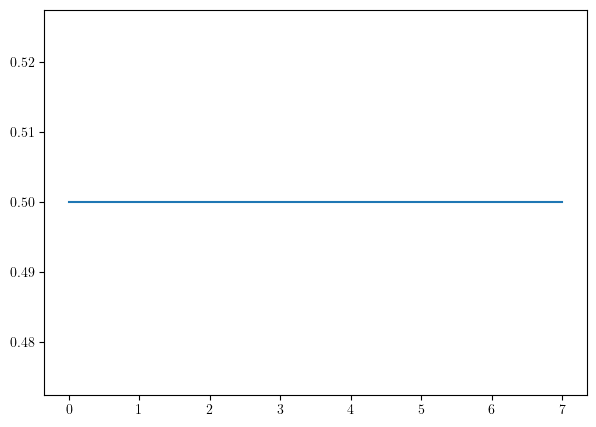

In [351]:
print(alphas)

plt.plot(alphas)
plt.show()

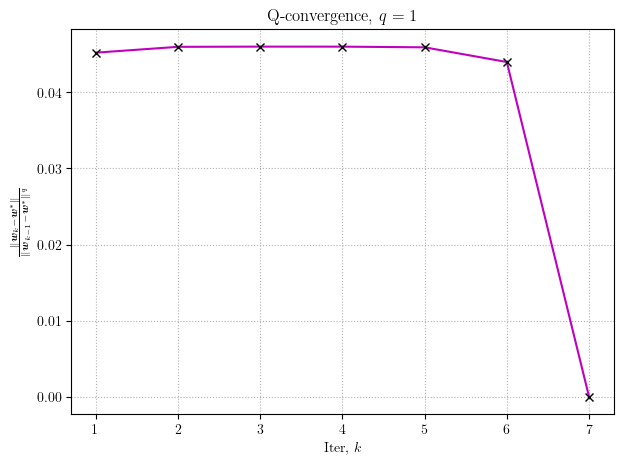

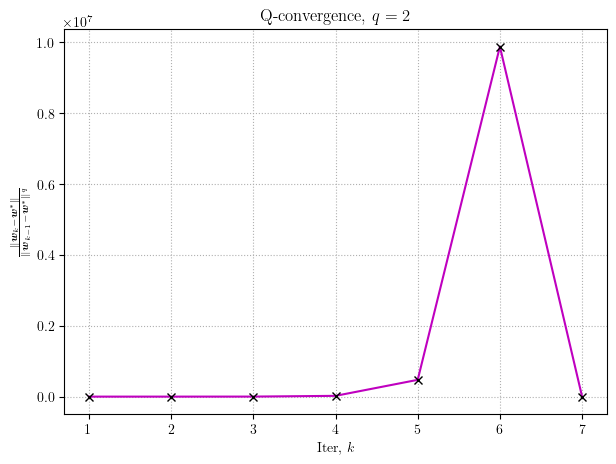

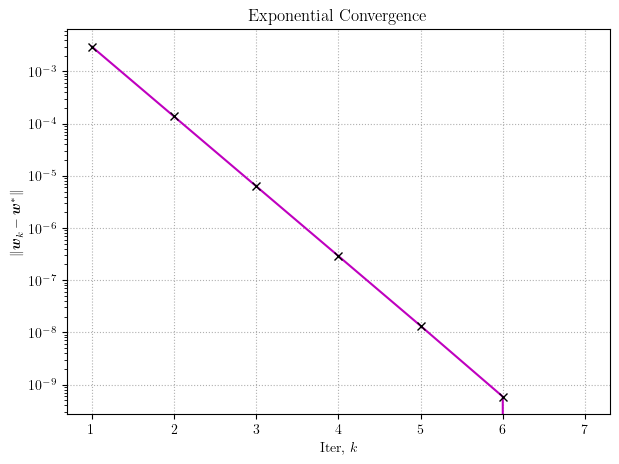

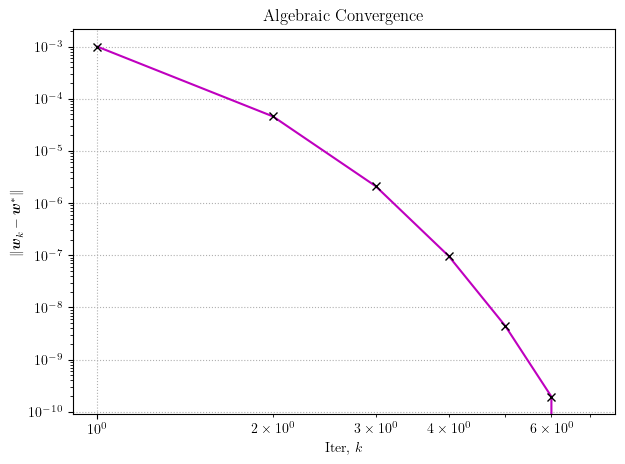

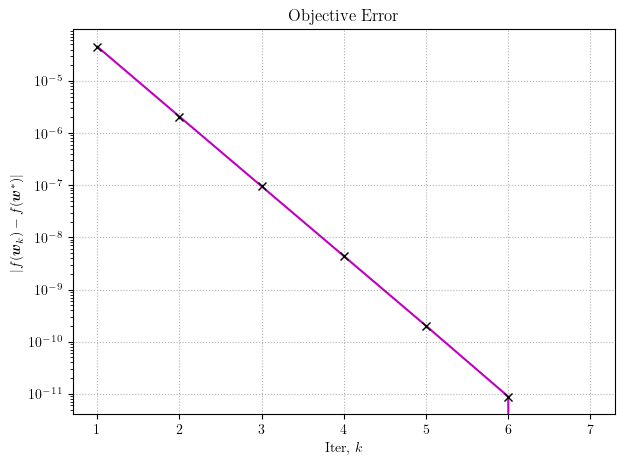

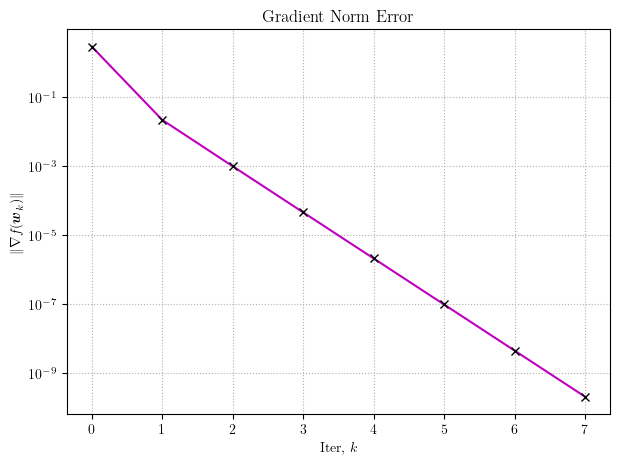

In [352]:
from plots import q_convergence, exponential_convergence, algebraic_convergence, objective_error, grad_norm 
import matplotlib.pyplot as plt

q_convergence(data, q=1)
q_convergence(data, q=2)

exponential_convergence(data)
algebraic_convergence(data)
objective_error(data)
grad_norm(data)